<a href="https://colab.research.google.com/github/Snehalatha83/Waste-Management/blob/main/Waste_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/techsash/waste-classification-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: snehalathamuttineni
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data


100%|██████████| 427M/427M [00:06<00:00, 71.8MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_path = "/content/waste-classification-data/DATASET/TRAIN"
test_path = "/content/waste-classification-data/DATASET/TEST"

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [ ]:
# Initialize data lists
x_data = []
y_data = []
image_size = (128, 128)  # Resize all images to 128x128 for consistency

# Process images
for category in tqdm(glob(train_path + '/*'), desc="Loading Categories"):
    label = category.split('/')[-1]
    for file in tqdm(glob(category + '/*'), desc=f"Processing {label}"):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img_array, image_size)  # Resize images
        x_data.append(img_array)
        y_data.append(label)


# Convert data to NumPy arrays
x_data = np.array(x_data, dtype="float32") / 255.0  # Normalize pixel values
y_data = np.array(y_data)

# Encode labels
label_encoder = LabelEncoder()
y_data_encoded = label_encoder.fit_transform(y_data)

# Create a DataFrame for visualization
data = pd.DataFrame({'image': list(x_data), 'label': y_data})

Loading Categories: 100%|██████████| 2/2 [00:13<00:00,  6.98s/it]


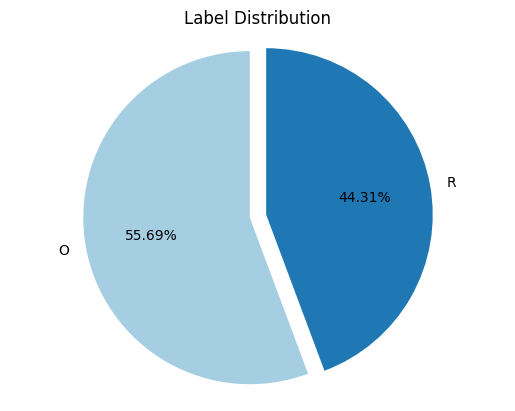

In [ ]:
label_counts = data['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%0.2f%%', startangle=90, explode=[0.05] * len(label_counts),
        colors=plt.cm.Paired.colors[:len(label_counts)])
plt.axis('equal')
plt.title("Label Distribution")
plt.show()